<div style="border:solid green 2px; padding: 20px">
<b>Сергей, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование надежности заемщиков.

**Оглавление:**
* [Шаг 1. Обзор данных](#step_1)
* [Шаг 2.1 Заполнение пропусков](#step_2_1)
* [Шаг 2.2 Проверка данных на аномалии и исправления.](#step_2_2)
* [Шаг 2.3. Изменение типов данных.](#step_2_3)
* [Шаг 2.4. Удаление дубликатов.](#step_2_4)
* [Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.](#step_2_5)
* [Шаг 2.6. Категоризация дохода.](#step_2_6)
* [Шаг 2.7. Категоризация целей кредита.](#step_2_7)
* [Ответы на вопросы.](#step_3)
* [Общий вывод:](#step_4)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Локально оглавление работает корректно, а вот здесь - не хочет.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

По этой разметке не подскажу, возможно какие-то особенности сервера.
    
</div>

**Цели исследования:**
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

### Шаг 1. Обзор данных <a id='step_1'></a>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Почему перед заголовками появились номера "0.1", "0.2" и т.д. и как их убрать?
<br>Похоже на вложенность заголовков, удобно, но не всегда нужно.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Это настройки плагина TOC.
    
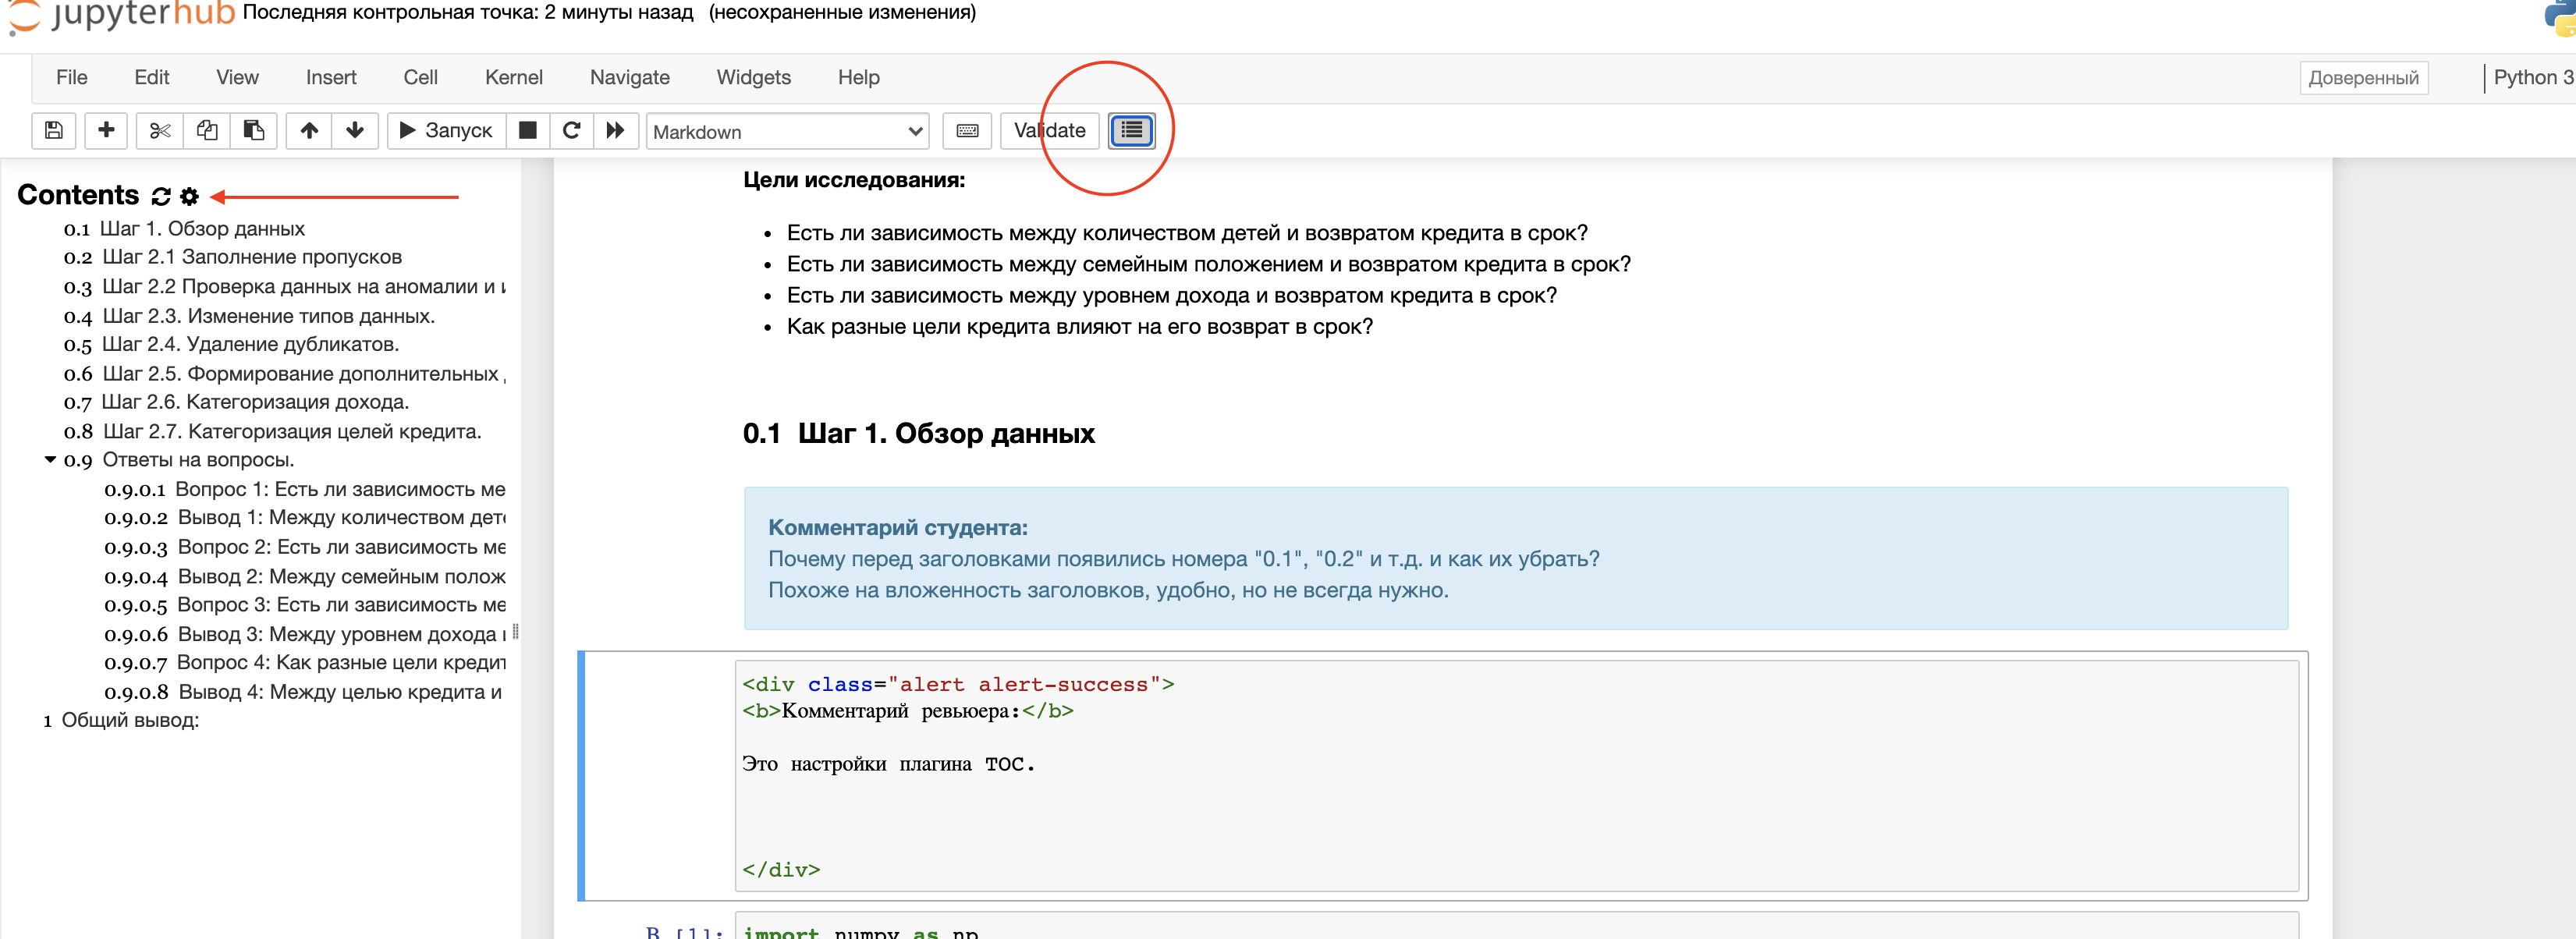

</div>

In [1]:
import numpy as np
import pandas as pd

In [2]:
PATH_DATA = r'/datasets/data.csv'

df_data = pd.read_csv(PATH_DATA)

**Описание данных**
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

In [3]:
df_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df_data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [6]:
df_data.duplicated().sum()

54

In [7]:
df_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [8]:
list(df_data.columns)

['children',
 'days_employed',
 'dob_years',
 'education',
 'education_id',
 'family_status',
 'family_status_id',
 'gender',
 'income_type',
 'debt',
 'total_income',
 'purpose']

**Выводы:**
1. Названия столбцов датасета в порядке.
2. В датасете присутствуют явные дубликаты.
3. Признаки "days_employed" и "total_income" содержат пропуски. Данные признаки имеют вещественный тип данных, что позволяет использовать основные статистики для обработки пропусков. При вычислении основных статистик будет полезна категоризация клиентов: клиенты со схожим образованием, семейным статусом, типом занятости могут иметь схожий ежемесячный доход.
4. Признак "children" имеет аномальные максимальные и минимальные значения.
5. Признак "days_employed" содержит аномальное максимальное значение 401755 дней, что эквивалентно более чем 1100 годам трудового стажа. Также присутствуют отрицательные значения, что логически противоречиво для данного признака.
6. Признак "dob_years" содержит аномальные минимальные значения 0.
7. Признаки "education" и "education_id" линейно зависимы.
8. Признаки "family_status" и "family_status_id" линейно зависимы.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально изучили наши первичные данные, давай теперь их обработаем. 
</div>

### Шаг 2.1 Заполнение пропусков <a id='step_2_1'></a>

Признаки "days_employed" и "total_income" содержат пропуски. Попробуем оценить долю пропусков и их распределение относительно друг друга.

In [9]:
df_data['days_employed'].isna().sum(), df_data['total_income'].isna().sum()

print(f'''
Количество объектов, с пропусками в признаке "days_employed":\t{df_data['days_employed'].isna().sum()}
Количество объектов, с пропусками в признаке "total_income":\t{df_data['total_income'].isna().sum()}
Количество объектов, с пропусками в обоих признаках:\t\t{df_data.loc[(df_data['days_employed']
.isna()) & (df_data['total_income'].isna()), :].shape[0]}
Доля пропусков от всего набора данных:\t\t\t\t{(df_data.loc[(df_data['days_employed']
.isna()) | (df_data['total_income'].isna()), :].shape[0] / df_data.shape[0]):.2%}
''')


Количество объектов, с пропусками в признаке "days_employed":	2174
Количество объектов, с пропусками в признаке "total_income":	2174
Количество объектов, с пропусками в обоих признаках:		2174
Доля пропусков от всего набора данных:				10.10%



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что подписываешь с помощью текста получившиеся расчеты 👍, так быстрее понять о чем идет речь.
</div>

In [10]:
df_data.loc[(df_data['days_employed'].isna()) | (df_data['total_income'].isna()), :].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


**Выводы:**
1. Количество объектов с каждым из пропусков совпадает с количеством объектов, где есть пропуск в обоих признаках. Это значит, что объекты совпадают, то есть 2174 объекта датасета имеют пропуски в обоих признаках.
2. Доля объектов с пропусками превышает 10% от всего объёма набора данных, что делает их исключение нежелательным во избежание потери информативности.
3. Причина возникновения пропусков неизвестна. Это может быть как технических фактор (ошибка при обработке данных), так и человеский (неверный формат заполнении данных, нежелание клиента сообщать информацию о себе). Возможности запросить информацию повторно или обогатить её нет, поэтому потребуется заполнить пропуски.
4. Признаки "days_employed" и "total_income" имеют вещественный тип данных, что позволяет вычислить основные статистики для заполнения пропсуков. При этом заполнение пропусков можно выполнить индивидуально для разных категорий клиентов (образование, вид деятельности). Для заполнения следует использовать медианные значения признаков, как наиболее объективно описывающие среднего представителя выборки: медиана устойчива к выбросам и отражает значения, лежащие в середине выборки.

In [11]:
# Запомним индексы объектов с пропусками.
index = df_data.loc[(df_data['days_employed'].isna()) | (df_data['total_income'].isna()), :].index

# Проверим объекты с пропусками.
df_data.loc[index, :].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [12]:
# Заполним пропуски признака "days_employed" медианными значениями групп клиентов с таким же образованием и типом дохода.
df_data['days_employed'] = df_data['days_employed'].fillna(
    df_data.groupby(by=['education_id', 'income_type'])['days_employed'].transform('median')
)

# Аналогично заполним пропуски признака "total_income".
df_data['total_income'] = df_data['total_income'].fillna(
    df_data.groupby(by=['education_id', 'income_type'])['total_income'].transform('median')
)

# Проверим результат.
df_data.loc[index, :].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,365025.338867,65,среднее,1,гражданский брак,1,M,пенсионер,0,114842.854099,сыграть свадьбу
26,0,-2857.770974,41,среднее,1,женат / замужем,0,M,госслужащий,0,136652.970357,образование
29,0,365025.338867,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,114842.854099,строительство жилой недвижимости
41,0,-2857.770974,50,среднее,1,женат / замужем,0,F,госслужащий,0,136652.970357,сделка с подержанным автомобилем
55,0,365025.338867,54,среднее,1,гражданский брак,1,F,пенсионер,1,114842.854099,сыграть свадьбу


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Очень крутой способ заполнить пропуски исходя из наших групп в данных, таким образом мы точечно повышаем уровень дисперсии в наших данных.
</div>

In [13]:
df_data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Все пропуски заполнены!
При этом на первых пяти объектах видно, что клиенты из одинаковых групп (схожее образование и тип деятельности) получили одинаковые медианные значения для своих групп.
Однако аномальные значения признака "days_employed" повлияли на результаты заполнения пропусков.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Возможно, в данном случае сперва нужно было обработать аномальные значения признака "days_employed" и только потом заполнять пропуски, чтобы аномалии не влияли на заполнение.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Да, такой подход тоже приемлемый. Вопрос только какое количество времени потратишь на их обработку, если очень много, то наверное не стоит этого делать.
    
</div>

### Шаг 2.2 Проверка данных на аномалии и исправления. <a id='step_2_2'></a>

Признаки "children", "days_employed" и "dob_years" содержат аномалии. Рассмотрим их подробнее.

In [14]:
df_data[['children', 'days_employed', 'dob_years']].describe()

,children,days_employed,dob_years
count,21525.000000,21525.000000,21525.000000
mean,0.538908,63549.804586,43.293380
std,1.381587,141151.038278,12.574584
min,-1.000000,-18388.949901,0.000000
25%,0.000000,-2541.439239,33.000000
50%,0.000000,-1339.266881,42.000000
75%,1.000000,-316.240646,53.000000
max,20.000000,401755.400475,75.000000


In [15]:
df_data.loc[df_data['children'] < 0, 'children'].value_counts()

-1    47
Name: children, dtype: int64

In [16]:
df_data.loc[df_data['children'] > 3, 'children'].value_counts()

20    76
4     41
5      9
Name: children, dtype: int64

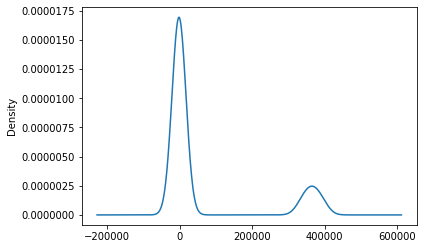

In [17]:
df_data['days_employed'].plot.density()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что уже используешь построение графиков 👍
</div>

In [18]:
df_data[df_data['days_employed'] < 0].shape[0]

17667

In [19]:
df_data[df_data['days_employed'] > 300000].shape[0]

3858

In [20]:
df_data.loc[df_data['dob_years'] < 18, 'dob_years'].value_counts()

0    101
Name: dob_years, dtype: int64

In [21]:
df_data[df_data['dob_years'] == 0].shape[0]

101

**Выводы:**
1. Признак "children" содержит 47 отрицательных значений "-1", что явно свидетельствует об ошибке. Данные ошибки могли появиться в результате некорректного ввода или парсинга данных. Значения могут быть исправлены, если взять их по модулю.
2. Признак "children" также содержит 76 значений "20", что косвенно свидетельствует об ошибке. Теоретически, в семье клиента может быть столько детей, однако в наборе данных этим записям предшествуют малочисленные клиенты с 4-мя и 5-ю детьми в семье, что позволяет предположить, что подобный резкий скачёк - ошибка. Возможно, при вводе информации в данных записях ошибочно дописали нуль, поэтому следует уменьшить их на один порядок.
3. Значения признака "days_employed" не могут быть корретно интерпретированы в условиях данной задачи: большинство объектов имеют отрицательные значения данного признака, что логически противоречиво. Остальные объекты имеют значения более 300000, что превышает 800 лет трудового стажа, что также противоречиво. Возможно, при заполнении признака знак "-" был поставлен ошибочно, данные умножили на несколько порядков или произошла порча, некорректная обработка информации. Исправление аномалий может привести к ещё большему искажению информации, поэтому данный признак следует исключить из дальнейшего рассмотрения.
4. Признак "dob_years" содержит 101 нулевое значение. Возможно, клиенты не захотели указывать свой возраст. Данные значения могут быть заменены медианными схожих групп клиентов.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Не понимаю, как иначе можно поступить с признаком "days_employed". Абсолютно неинформативный признак.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Можно привести к: 
    
- положительным значениям
- это трудовой стаж в днях, поделить на кол-во дней в году и убрать самые аномальные значения (как вариант)
    
</div>

In [22]:
# Исправление отрицательных значений.
df_data['children'] = np.abs(df_data['children'])

# Исправление выбросов.
df_data.loc[df_data['children'] == 20, 'children'] = 2

# Проверка исправлений.
df_data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

А если бы мы посмотрели на долю этих значений, то смогли бы принять решение в сторону избавления от этих данных ? 
    
</div>

In [23]:
# Исключение признака "days_employed" из набора данных.
df_data = df_data.drop(columns=['days_employed'])

# Проверка.
df_data.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [24]:
# Запомним индексы объектов, где нулевое значение признака "dob_years".
index = df_data[df_data['dob_years'] == 0].index

# Заменим нулевые значения на NaN.
df_data.loc[df_data['dob_years'] == 0, 'dob_years'] = np.nan

# Выполним заполнение при помощи метода .fillna() медианными значениями схожих групп клиентов.
# Схожее образование, семейный статус, пол и тип занятости.
df_data['dob_years'] = df_data['dob_years'].fillna(
    df_data.groupby(by=['education_id', 'family_status_id', 'gender', 'income_type'])['dob_years'].transform('median')
)

# Преобразуем значения в целочисленный тип, если медиана получилась бробным числом.
df_data['dob_years'] = df_data['dob_years'].astype('int')

# Выполним проверку.
df_data.loc[index, :].head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,59,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,44,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,41,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,59,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,41,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль


In [25]:
df_data.describe()

,children,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.479721,43.493984,0.817236,0.972544,0.080883,1.653537e+05
std,0.755528,12.234238,0.548138,1.420324,0.272661,9.814856e+04
min,0.000000,19.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,33.000000,1.000000,0.000000,0.000000,1.077193e+05
50%,0.000000,43.000000,1.000000,0.000000,0.000000,1.434963e+05
75%,1.000000,53.000000,1.000000,1.000000,0.000000,1.981493e+05
max,5.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Аномалии в признаках "children", "dob_years" обработаны. Признак "days_employed" удалён.	

### Шаг 2.3. Изменение типов данных. <a id='step_2_3'></a>

Признак "total_income" может быть приведён из вещественного типа данных к целочисленному.

In [26]:
# Округление значений перед преобразованием, так как int просто отбросит дробную часть.
df_data['total_income'] = np.round(df_data['total_income'])

# Преобразование типа данных.
df_data['total_income'] = df_data['total_income'].astype('int')

# Проверка.
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
children            21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


In [27]:
df_data.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253876,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145886,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267629,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Тип данных признака "total_income" был изменён на целочисленный.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
Будем иметь в виду этот способ на будущее.
    
</div>

### Шаг 2.4. Удаление дубликатов. <a id='step_2_4'></a>

В наборе данных отсутствует уникальный идентификатор клиента, поэтому данные могут быть задублированы, что негативно скажется на качестве обучения модели. Перед удалением дубликатов проверим наличие неявных дубликатов.

In [28]:
df_data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [29]:
df_data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [30]:
df_data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

In [31]:
df_data['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

**Выводы:**
1. Значения признака "education" содержат неявные дубликаты, написанные разным регистром и стилем. Перед удаление дубликатов необходимо стандартизировать значения признака - привести к одному виду, к прописным символам.
2. Значения признака "purpose" также содержат неявные дубликаты. Их обработка более сложна и вынесена в отдельный Шаг 2.7.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Возможно, в данном случае сперва нужно было категоризировать признаки "total_income" и "purpose", так как после этого могут появиться дополнительные дубликаты.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Если только действительно дубликаты появляются. В целом признак общего трудового стажа не стоило удалять, т.к. он давал какую-то уникальность строк в том числе.    
</div>

In [32]:
# Преобразование значений признака "education" в нижний регистр.
df_data['education'] = df_data['education'].str.lower()

# Проверка.
df_data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [33]:
# Размерность набора данных до удаления дубликатов.
df_data.shape

(21525, 11)

In [34]:
# Количество дубликатов в наборе данных.
df_data.duplicated().sum()

71

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что произвели текст в нижний регистр, как раз таким образом мы смогли устранить неявные дубликаты.
    
Сами дубликаты  нам ни к чему и очень здорово, что мы их удалили 😊
    
</div>

In [35]:
# Удаление дубликатов, обновление индекса.
df_data = df_data.drop_duplicates().reset_index(drop=True)

# Проверка.
df_data.shape

(21454, 11)

В результате обработки признака "education" был выявлен и удален 71 дубликат. Для поиска и удаления дубликатов были использованы стандартные методы pandas .duplicated() и .drop_duplicates(). Причиной возникновения дубликатов мог быть как человеческий фактор (несколько специалистов внесли одного клиента в базу несколько раз), так и технический (десинронизация при копировании информации).

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма. <a id='step_2_5'></a>

Признаки "education" и "education_id", "family_status" и "family_status_id" - линейно зависимы, то есть дублируют друг друга. По правилам нормализации табличной информации, часть информации может быть вынесена в отдельные таблицы в целях уменьшения объёма исходной таблицы и упрощения взаимодействия с ней.

In [36]:
# Создание нового словаря.
df_dict_education = df_data[['education_id', 'education']].copy()

# Удаление дубликатов в новом словаре.
df_dict_education = df_dict_education.drop_duplicates().reset_index(drop=True)

# Удаление избыточного признака в исходном наборе данных.
df_data = df_data.drop(columns=['education'])

# Проверка нового словаря.
df_dict_education

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [37]:
# Создание нового словаря.
df_dict_family_status = df_data[['family_status_id', 'family_status']].copy()

# Удаление дубликатов в новом словаре.
df_dict_family_status = df_dict_family_status.drop_duplicates().reset_index(drop=True)

# Удаление избыточного признака в исходном наборе данных.
df_data = df_data.drop(columns=['family_status'])

# Проверка нового словаря.
df_dict_family_status

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


In [38]:
# Проверка набора данных.
df_data.head()

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,0,0,F,сотрудник,0,253876,покупка жилья
1,1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,33,1,0,M,сотрудник,0,145886,покупка жилья
3,3,32,1,0,M,сотрудник,0,267629,дополнительное образование
4,0,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


Были созданы две новые таблицы-словаря для признаков "education" и "family_status". Исходный набор данных был оптимизирован.

### Шаг 2.6. Категоризация дохода. <a id='step_2_6'></a>

Для лучшей категоризации клиентов непрерывный признак "total_income" может быть дополнен признаком "total_income_category" со следующими категориями в зависимости от значений признака "total_income":
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

In [39]:
# Функция для категоризации клиентов в зависимости от их уровня доходов.
def func_total_income_category(total_income):
    try:
        if 0 <= total_income <= 30000:
            return 'E'

        elif 30001 <= total_income <= 50000:
            return 'D'

        elif 50001 <= total_income <= 200000:
            return 'C'

        elif 200001 <= total_income <= 1000000:
            return 'B'

        elif 1000001 <= total_income:
            return 'A'

        else:
            return 'none_category'
    
    except:
        return 'error_exception'

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный способ категоризовать данные по уровню дохода.
    
Думаю теперь разработать любую категорию в данных для нас не составит труда.
</div>

In [40]:
# Проверка работы функции.
func_total_income_category(100)

'E'

In [41]:
# Проверка работы функции.
func_total_income_category(200100)

'B'

In [42]:
# Проверка работы функции.
func_total_income_category(-200)

'none_category'

In [43]:
# Проверка работы функции.
func_total_income_category('Hello')

'error_exception'

In [44]:
# Генерация нового признака.
df_data['total_income_category'] = df_data['total_income'].apply(func_total_income_category)

# Проверка.
df_data.head()

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,42,0,0,F,сотрудник,0,253876,покупка жилья,B
1,1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,33,1,0,M,сотрудник,0,145886,покупка жилья,C
3,3,32,1,0,M,сотрудник,0,267629,дополнительное образование,B
4,0,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


In [45]:
df_data['total_income_category'].value_counts()

C    15829
B     5228
D      350
A       25
E       22
Name: total_income_category, dtype: int64

Для категоризации клиентов была написана функция "func_total_income_category", которая в зависимости от уровня доходов клиентов "total_income" присваивает им определённую категорию. Затем в исходном наборе данных был создан новый признак "total_income_category" с соответствующей категорией клиента.

### Шаг 2.7. Категоризация целей кредита. <a id='step_2_7'></a>

Признак "purpose" содержит множество неявных дубликатов: одна цель описана разными словами. Данный признак следует категоризировать.

In [46]:
df_data['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

In [47]:
# Функция для категоризации цели выдачи кредита.
def func_purpose_category(purpose):
    try:
        if 'автомобил' in purpose:
            return 'операции с автомобилем'

        elif ('жиль' in purpose) or ('недвижимост' in purpose):
            return 'операции с недвижимостью'

        elif 'свадьб' in purpose:
            return 'проведение свадьбы'

        elif 'образовани' in purpose:
            return 'получение образования'

        else:
            return 'none_category'
    
    except:
        return 'error_exception'

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Категории кредитов опредилили верно 👍
    
</div>

In [48]:
# Проверка работы функции.
print(f'''
Аргумент функции:\t\t"{df_data.iloc[1, 8]}"
Результат работы функции:\t"{func_purpose_category(df_data.iloc[1, 8])}"
''')


Аргумент функции:		"приобретение автомобиля"
Результат работы функции:	"операции с автомобилем"



In [49]:
# Проверка работы функции.
print(f'''
Аргумент функции:\t\t"{df_data.iloc[3, 8]}"
Результат работы функции:\t"{func_purpose_category(df_data.iloc[3, 8])}"
''')


Аргумент функции:		"дополнительное образование"
Результат работы функции:	"получение образования"



In [50]:
# Проверка работы функции.
print(f'''
Аргумент функции:\t\t"test"
Результат работы функции:\t"{func_purpose_category("test")}"
''')


Аргумент функции:		"test"
Результат работы функции:	"none_category"



In [51]:
# Проверка работы функции.
print(f'''
Аргумент функции:\t\t123
Результат работы функции:\t"{func_purpose_category(123)}"
''')


Аргумент функции:		123
Результат работы функции:	"error_exception"



In [52]:
# Генерация нового признака.
df_data['purpose_category'] = df_data['purpose'].apply(func_purpose_category)

# Проверка.
df_data.head()

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,42,0,0,F,сотрудник,0,253876,покупка жилья,B,операции с недвижимостью
1,1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,33,1,0,M,сотрудник,0,145886,покупка жилья,C,операции с недвижимостью
3,3,32,1,0,M,сотрудник,0,267629,дополнительное образование,B,получение образования
4,0,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [53]:
df_data['purpose_category'].value_counts()

операции с недвижимостью    10811
операции с автомобилем       4306
получение образования        4013
проведение свадьбы           2324
Name: purpose_category, dtype: int64

Для категоризации цели кредита была написана функция "func_purpose_category", которая принимает цель кредита "purpose" в виде производльной строки и ищет ключевые слова, на основании которых выполняет категоризацию. Затем в исходном наборе данных был создан новый признак "purpose_category" с соответствующей категорией цели кредита.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Возможно, следует удалить признак "purpose", так как его полностью заменил новый признак "purpose_category".

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хочется сказать, что лучше вообще ничего из данных не удалять 😊, собственно мы всегда успеем это сделать в любой момент. Потому что сейчас эти данные не нужны, а через 3 часа понадобятся т.к. придет какая-то идея. И что тогда придется делать: 
    
- перезапускать тетрадку
- прогонять до того момента, где еще не удалили столбец

    
Собственно тратить лишнее время на то, что можно было не тратить 😊
    
</div>

### Ответы на вопросы. <a id='step_3'></a>

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

Сгруппируем клиентов по количеству детей и рассмотрим среднее значение целевой перменной в каждой группе.

In [54]:
df_data.pivot_table(
    values='debt', index='children', aggfunc=['count', 'mean']
).sort_values(('mean', 'debt'), ascending=False)

,count,mean
,debt,debt
children,,
4,41,0.097561
2,2128,0.094925
1,4855,0.091658
3,330,0.081818
0,14091,0.075438
5,9,0.000000


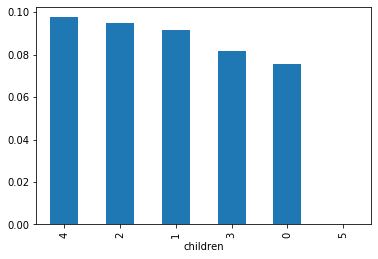

In [55]:
df_data.pivot_table(
    values='debt', index='children', aggfunc=['mean']
).sort_values(('mean', 'debt'), ascending=False).plot(kind='bar', legend=False)

##### Вывод 1: Между количеством детей и возвратом кредита в срок есть зависимость.

Самая многочисленная группа клиентов (около двух третей всей выборки) без детей показала, что в ~7.5% случаев происходит задолжность по возврату кредита. В оставшихся группах преобладают клиенты с одним ребёнком и двуми детьми, где средний процент невозврата кредита в срок выше более чем на полтора процентных пункта и превышает показатель в 9.1%, что выше показателя группы без детей более чем на пятую часть. Остальные группы с тремя детьми и более малочисленны (около ~1.5% от всей выборки) и поэтому не могут быть полноценно рассмотрены.

Таким образом, рассмотрение средних значений групп клиентов с детьми и без показывает, что клиенты с детьми в среднем имеют примерно на ~20% больше задолжностей по выплатам в срок, чем клиенты без детей.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Верно 👍
    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Без применения статистических методов исследования сложно дать более точный ответ.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

Сгруппируем клиентов по семейному положению и рассмотрим среднее значение целевой перменной в каждой группе.

In [56]:
df_data.merge(df_dict_family_status, on='family_status_id').pivot_table(
    values='debt', index='family_status', aggfunc=['count', 'mean']
).sort_values(('mean', 'debt'), ascending=False)

,count,mean
,debt,debt
family_status,,
Не женат / не замужем,2810,0.097509
гражданский брак,4151,0.093471
женат / замужем,12339,0.075452
в разводе,1195,0.071130
вдовец / вдова,959,0.065693


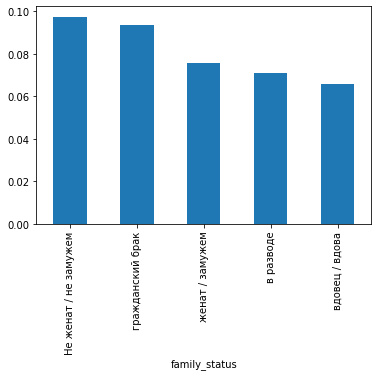

In [57]:
df_data.merge(df_dict_family_status, on='family_status_id').pivot_table(
    values='debt', index='family_status', aggfunc=['mean']
).sort_values(('mean', 'debt'), ascending=False).plot(kind='bar', legend=False)

##### Вывод 2: Между семейным положением и возвратом кредита в срок есть зависимость.

Самая многочисленная группа клиентов (57.5% от всей выборки), которые состоят в браке, в 7.5% случаев имели задолжность по возврату кредита. Следующие две группы клиентов со статусами "гражданский брак" (19.3%) и "Не женат / не замужем" (13.1%) просрочили выплаты в 9.3% и 9.8% случаях соответственно, что отлично от показателя первой группы клиентов. Последние две группы клиентов со статусами "в разводе" (5.6%) и "вдовец / вдова" (4.5%) имеют наилучшие показатели дефолта 7.1% и 6.6% соответственно, однако данные группы малочисленны и их показатели могут измениться при рассмотрении большего числа представителей.

Резюмируя, доля неисполнения обязательств меняется в зависимости от группы клиентов с различным семейным положением.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В точку 👍
    
Обрати внимание, что наши действия повторяются с точки зрения расчетов.
    
Это говорит о том, что мы можем создать функцию для постоянных расчетов. Тем самым мы сможем оптимизировать свой код 😊
    
</div>

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Сгруппируем клиентов по уровню дохода и рассмотрим среднее значение целевой перменной в каждой группе.

In [58]:
pd.set_option('float_format', '{:f}'.format)

df_data.pivot_table(
    values=['debt', 'total_income'], index='total_income_category', aggfunc=['count', 'mean']
).sort_values(('mean', 'debt'), ascending=False)

count                  mean               
                        debt total_income     debt   total_income
total_income_category                                            
E                         22           22 0.090909   25795.500000
C                      15829        15829 0.085413  127499.920778
A                         25           25 0.080000 1339118.240000
B                       5228         5228 0.069625  283546.810444
D                        350          350 0.060000   42901.248571

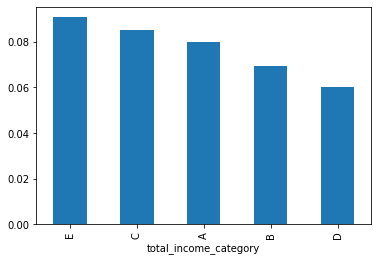

In [59]:
df_data.pivot_table(
    values=['debt'], index='total_income_category', aggfunc=['mean']
).sort_values(('mean', 'debt'), ascending=False).plot(kind='bar', legend=False)

##### Вывод 3: Между уровнем дохода и возвратом кредита в срок есть зависимость.

Наиболее часто (в 9% случаев) дефолты происходят в самой малочисленной группе клиентов с минимальным уровнем дохода, однако данная группа настолько малочисленна (22 объекта), что её показатели не могут быть рассмотрены наравне с другими большими группами. Аналогичным образом не может быть рассмотрена категория клиентов с наибольшими доходами, где доля дефолтов 8%, которая состоит из 25 объектов. Наиболее показательными являются группы клиентов с категориями дохода "C" и "B", которые занимают порядка 98% всей выборки. Данные группы имеют доли неисполнения обязательств 8.5% и 7% соответственно, что представляет собой существенную разницу. Группа "D" также малочисленна (1.5% от всей выборки) и имеет наилучший показатель в 6% доли неисполнения обязательств.

Уровень дохода клиента действительно влияет на вероятность возврата кредита в срок: в целом наблюдается тенденция, что с увеличением дохода уменьшается риск дефолта.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Верно 👍
    
В том числе можно было посчитать с помощью метода группировки `groupby`, будем иметь в виду на будущее.
    
</div>

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

Сгруппируем клиентов по цели кредита и рассмотрим среднее значение целевой перменной в каждой группе.

In [60]:
df_data.pivot_table(
    values='debt', index='purpose_category', aggfunc=['count', 'mean']
).sort_values(('count', 'debt'), ascending=False)

,count,mean
,debt,debt
purpose_category,,
операции с недвижимостью,10811,0.072334
операции с автомобилем,4306,0.093590
получение образования,4013,0.092200
проведение свадьбы,2324,0.080034


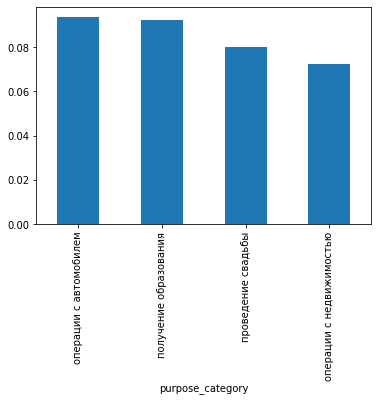

In [61]:
df_data.pivot_table(
    values='debt', index='purpose_category', aggfunc=['mean']
).sort_values(('mean', 'debt'), ascending=False).plot(kind='bar', legend=False)

##### Вывод 4: Между целью кредита и возвратом кредита в срок есть зависимость.

Наиболее часто (около половины всех случаев) клиенты берут кредит на операции с недвижимостью, здесь же наблюдается наименьший процент невозвратов - в 7.2% случаев. Цели "операции с автомобилем" и "получение образования" имеют схожие характеристики: их доли от всей выборки составляют около 20% и сопровожадются максимальными рисками дефолта - 9.3% и 9.2% соответственно. Категория "проведение свадьбы" является самой редкой (чуть более 10% выборки) и выражена средними показателями риска - в 8% случаев клиенты не возвращали кредит в срок.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В точку 👍

На самом деле очень круто, что уже применяешь визуализацию. Поэтому рекомендовал бы не забывать подписывать сами графики 😊, делается это с помощью параметра `hist(title='My title')`
</div>

## Общий вывод: <a id='step_4'></a>

Для выполнения целей исследования потребовалось провести обработку данных: заполнить пропуски, удалить дубликаты и обработать аномалии, провести категоризацию. В результате трудоёмкой операции данные получили репрезентативный вид и стали удобны для проведения исследования.

**Цели исследования:**
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

На каждый из поставленных вопросов удалось получить утвердительный ответ: между всем факторами и возвратом кредита в срок действительно есть зависимость. Однако каждый из ответов был получен с неопределённой степенью урененности. Для более детальных ответов необходимы применение статистических методов исследования и проверка статистических гипотез.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас.
    
Хочется отметить, что мы узнали достаточно много нового в этом проекте и с уверенностью можем двигаться дальше. На что рекомендую обращать внимание сразу с самого старта так сказать, а именно на повторяемость кода. Если наши действия начинают повторяться более 2-х раз, то имеет смысл задуматься над: 
    
- внедрением цикла 
- внедрением функции
- внедрением комбинации цикл + функция
    
Такие вещи могут сразу не бросаться в глаза, но постепенно мы придём к такому подходу 😊
    
Т.к. особо критичных замечаний нет, то я предлагаю двигаться дальше. Но! Если вдруг у тебя возникнут какие-либо вопросы ко мне, обязательно напиши их куратору и он мне их передаст. Я в свою очередь пришлю свои ответы. Понимаю как важно задать любой вопрос в самом начале, через такое сам проходил.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
**[общий комментарий]** Не стоит забывать про оформление своей работы, это важный такой же важный этап. Рекомендую «не стесняться» использовать ячейки типа **markdown** там где нам необходимо отобразить свои размышления, в том числе с использованием дополнительной стилизации.
    
https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
    
</div>